# Part A - 20 Marks

__DOMAIN__: Entertainment

__CONTEXT__: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. The data labelling is already done. Since there higher time complexity is involved in the

__DATA DESCRIPTION__: The dataset comprises of images and its mask for corresponding human face.

__PROJECT OBJECTIVE__: To build a face detection system.

### Steps and tasks: [ Total Score: 20 Marks]

In [125]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow.keras.utils
from tensorflow import keras
import matplotlib.patches as patches
import tensorflow as tf

### 1. Import and Understand the data [7 Marks]

__A__. Import and read `images.npy`. [1 Marks]

In [4]:
imgs = np.load("./drive/MyDrive/images.npy", allow_pickle = True)

In [5]:
imgs.shape

(409, 2)

__B__. Split the data into Features(`X`) & labels(`Y`). Unify shape of all the images. [3 Marks]

In [6]:
BOXES = []
outer_index = 0
for img in imgs:
    BOXES.append([])
    for dictionaries in img[1]:
        BOXES[outer_index].append(dictionaries["points"])
    outer_index += 1

In [7]:
maximum = 0 
for index, bounding_boxes in enumerate(BOXES):
    print(len(bounding_boxes))
    if len(bounding_boxes) > maximum:
        maximum = len(bounding_boxes)
    for bounding_box in bounding_boxes:
        print(bounding_box)
    print("\n\n\n")
    if index > 5:
        break
    
print(f"The maximum num of  bounding boxes in a sample is {maximum}")

2
[{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}]
[{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}]




1
[{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}]




2
[{'x': 0.46956521739130436, 'y': 0.05}, {'x': 0.6065217391304348, 'y': 0.3333333333333333}]
[{'x': 0.6282608695652174, 'y': 0.008333333333333333}, {'x': 0.7456521739130435, 'y': 0.30833333333333335}]




1
[{'x': 0.495, 'y': 0.27147766323024053}, {'x': 0.595, 'y': 0.46048109965635736}]




6
[{'x': 0.5586206896551724, 'y': 0.19938650306748465}, {'x': 0.6603448275862069, 'y': 0.3773006134969325}]
[{'x': 0.38620689655172413, 'y': 0.18711656441717792}, {'x': 0.4896551724137931, 'y': 0.4049079754601227}]
[{'x': 0.1724137931034483, 'y': 0.23006134969325154}, {'x': 0.2775862068965517, 'y': 0.44171779141104295}]
[{'x': 0.7155172413793104, 'y': 0.19938650306748465}, 

# There are variable number of bounding boxes per image 😲

In [8]:
# The unified shape will be 128 X 128
normalized_image_height,normalized_image_width = 128, 128
normalized_images = np.zeros(shape = (409, normalized_image_height, normalized_image_width, 3))
normalized_bounding_boxes = BOXES[:][:][:][:]
output_image_mask = np.zeros(shape = (409, normalized_image_height, normalized_image_width, 1))

In [9]:
from tensorflow.keras.applications.mobilenet import preprocess_input


for i in range(409):
    #print(f"{i} : {imgs[i][0].shape}")
    temp = np.atleast_3d(imgs[i][0])
    if temp.shape[-1] < 3:
        temp = np.repeat(temp, repeats = 3, axis = -1)
        #print(temp.shape)
        #print(temp)
    img = Image.fromarray(temp[:, :, :3])#imgs[i][0][:, :, :3])#.mean(axis = -1))
    img_height, img_width = (imgs[i][0].shape[0], imgs[i][0].shape[1])
    img = img.resize((128,128))
    im = np.asarray(img.convert("RGB"))#(img.resize((112,112)))
    normalized_images[i] = preprocess_input(im)#.reshape((128,128,3))
    temp = normalized_images[i]#.mean(axis=-1
    #output_image_mask[i] = temp#.reshape((128, 128, 1))
    for index, bounding_boxes in enumerate(BOXES[i]):
        normalized_bounding_boxes[i][index][0]["x"] = bounding_boxes[0]["x"] * normalized_image_width 
        normalized_bounding_boxes[i][index][1]["x"] = (bounding_boxes[1]["x"] ) *  normalized_image_width 
        normalized_bounding_boxes[i][index][0]["y"] = bounding_boxes[0]["y"] * normalized_image_height
        normalized_bounding_boxes[i][index][1]["y"] = (bounding_boxes[1]["y"]) * normalized_image_height
        
        for x in range(int(normalized_bounding_boxes[i][index][0]["x"] -1 ),
                       int(normalized_bounding_boxes[i][index][1]["x"]) 
                      ):
            for y in range(int(normalized_bounding_boxes[i][index][0]["y"] - 1),
                           int(normalized_bounding_boxes[i][index][1]["y"] )
                          ):
                output_image_mask[i][y][x] = 1 #normalized_images[i][y][x]


__C.__ Split the data into `train` and `test`[400:9]. [1 Marks]

In [10]:
train_X, train_Y, test_X, test_Y = normalized_images[:400], output_image_mask[:400], normalized_images[400:], output_image_mask[400:]

print(f"""
training samples shape : {train_X.shape}\n
training labels shape : {train_Y.shape}\n
test samples shape : {test_X.shape}\n
Test labels shape : {test_Y.shape}
"""
)


training samples shape : (400, 128, 128, 3)

training labels shape : (400, 128, 128, 1)

test samples shape : (9, 128, 128, 3)

Test labels shape : (9, 128, 128, 1)



__D.__ Select random image from the train data and display original image and masked image. [2 Marks]

I'm showing ugly image since it's being asked to show image from _train_ set

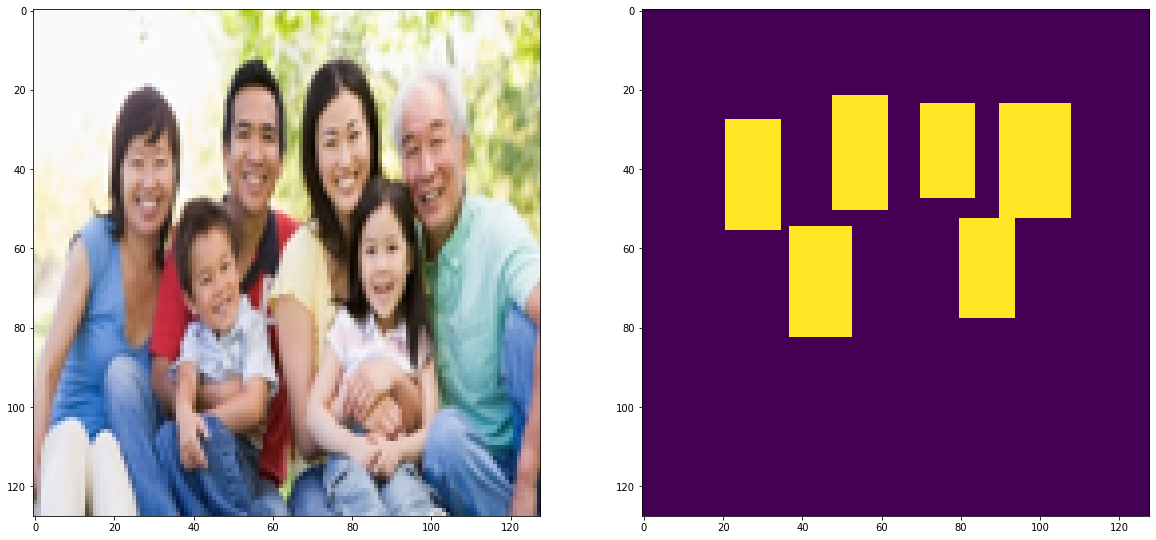

In [11]:
fig, axes = plt.subplots(1,2, figsize = (20, 20))


axes[0].imshow(keras.utils.array_to_img(normalized_images[4]))

axes[1].imshow(keras.utils.array_to_img(output_image_mask[4]))

plt.show()

# 2. Model building [11 Marks]

__A.__ Design a face mask detection model. [4 Marks]

In [14]:
from tensorflow.keras import layers

In [15]:
img_size = (128, 128)
num_classes = 1

inputs = keras.Input(shape = img_size + (3,))
x = layers.Rescaling(1. / 255)(inputs) 
x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, strides = 2, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2DTranspose(256, 3, activation = "relu", padding = "same")(x)
x = layers.Conv2DTranspose(256, 3, activation = "relu", padding = "same", strides = 2)(x)
x = layers.Conv2DTranspose(128, 3, activation = "relu", padding = "same")(x)
x = layers.Conv2DTranspose(128, 3, activation = "relu", padding = "same", strides = 2)(x)
x = layers.Conv2DTranspose(64, 3, activation = "relu", padding = "same")(x)
x = layers.Conv2DTranspose(64, 3, activation = "relu", padding = "same", strides = 2)(x)
outputs = layers.Conv2D(num_classes, 3, activation = "sigmoid", padding = "same")(x)

my_own_model = keras.Model(inputs, outputs)


In [27]:
my_own_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       295168

__B.__ Design your own Dice Coefficient and Loss function. [2 Marks]

In [13]:


def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon()) # to prevent division-by-zero

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [16]:
my_own_model.compile(
    optimizer = "rmsprop",
    metrics = ["accuracy"],
    loss = loss
)

__C.__ Train and tune the model as required. [3 Marks]

In [ ]:
np.save("train_X.npy", train_X)
np.save("test_X.npy", test_X)
np.save("train_Y.npy", train_Y)
np.save("test_Y.npy", test_Y)

In [ ]:
train_X = np.load("train_X.npy")
train_Y = np.load("train_Y.npy")
test_X = np.load("test_X.npy")
test_Y = np.load("test_Y.npy")



In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = "./best_secondary.keras",
                                            monitor = "val_loss"
                                           ),
    keras.callbacks.ReduceLROnPlateau(patience = 10),
    keras.callbacks.EarlyStopping(patience = 20)
]

In [18]:
history = my_own_model.fit(
    x = train_X,
    y = train_Y,
    validation_data = (test_X, test_Y),
    batch_size = 1,
    epochs = 100,
    callbacks = callbacks
)

Epoch 1/100
400/400 [==============================] - 17s 9ms/step - loss: 2.5890 - accuracy: 0.7740 - val_loss: 2.2007 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 2/100
400/400 [==============================] - 4s 9ms/step - loss: 2.0948 - accuracy: 0.7293 - val_loss: 1.9791 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 3/100
400/400 [==============================] - 4s 9ms/step - loss: 1.9391 - accuracy: 0.7411 - val_loss: 1.8506 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 4/100
400/400 [==============================] - 4s 9ms/step - loss: 1.9440 - accuracy: 0.7666 - val_loss: 1.8122 - val_accuracy: 0.7672 - lr: 0.0010
Epoch 5/100
400/400 [==============================] - 4s 9ms/step - loss: 1.8962 - accuracy: 0.7714 - val_loss: 2.7039 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 6/100
400/400 [==============================] - 4s 9ms/step - loss: 1.8462 - accuracy: 0.8096 - val_loss: 1.8417 - val_accuracy: 0.8544 - lr: 0.0010
Epoch 7/100
400/400 [==============================] - 4s 9ms/s

__D.__ Evaluate and share insights on performance of the model. [2 Marks]

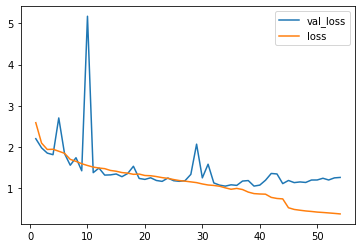

In [19]:
plt.plot(range(1, len(history.history["val_loss"]) + 1), history.history["val_loss"], label = "val_loss")
plt.plot(range(1, len(history.history["val_loss"]) + 1), history.history["loss"], label = "loss")

plt.legend()

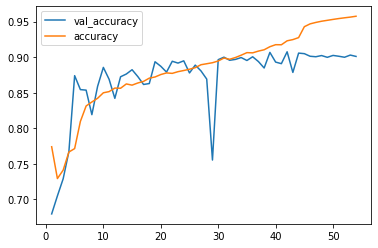

In [20]:
plt.plot(range(1, len(history.history["val_loss"]) + 1), history.history["val_accuracy"], label = "val_accuracy")
plt.plot(range(1, len(history.history["val_loss"]) + 1), history.history["accuracy"], label = "accuracy")
plt.legend()

# Looks model performance is good now

__3.__ Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image. [2 Marks]

In [21]:
import gc
gc.collect()

1658

In [23]:
pred = my_own_model.predict(test_X[np.newaxis, 3])

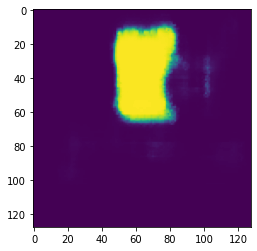

In [24]:
plt.imshow(keras.utils.array_to_img(pred.reshape(128, 128, 1)))

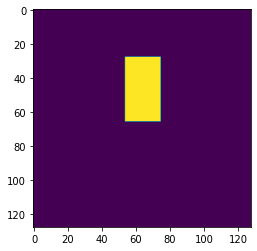

In [25]:
plt.imshow(keras.utils.array_to_img(test_Y[3]))

# Part B - 10 Marks

__DOMAIN__: Entertainment

__CONTEXT__: Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene. The data labelling is already done. Since there higher time complexity is involved in the

__DATA DESCRIPTION__: The dataset comprises of face images.

__PROJECT OBJECTIVE__: To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

### Steps and tasks: [ Total Score: 10 Marks]

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
import os

### 1. Read/import images from folder ‘training_images’. [2 Marks]

In [3]:
images = []
paths = []
folder = "./drive/MyDrive/training_images"
for image_path in os.listdir(folder):
    paths.append(image_path)
    img = cv.imread(os.path.join(folder,image_path))
    if img is not None:
        images.append(img)


### 2.Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

In [7]:
face_model = cv.CascadeClassifier("./drive/MyDrive/haarcascade_frontalface_default.xml")

In [74]:
co_ords = {}
co_ords["x"] = []
co_ords["y"] = []
co_ords["w"] = []
co_ords["h"] = []
co_ords["num_faces"] = []
co_ords["Image_Name"] = []
for index, image in enumerate(images):
  locs = face_model.detectMultiScale(image)
  if len(locs) > 0:
      locs = locs[0].tolist()
      #print(locs)
      co_ords["x"].append(locs[0])
      co_ords["y"].append(locs[1])
      co_ords["w"].append(locs[2])
      co_ords["h"].append(locs[3])
      co_ords["num_faces"].append(len(locs) // 4)
      co_ords["Image_Name"].append(paths[index])



### 3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [75]:
import pandas as pd

In [76]:
data = pd.DataFrame(co_ords)

In [77]:
data

,x,y,w,h,num_faces,Image_Name
0,86,134,417,417,1,real_00141.jpg
1,29,112,429,429,1,real_00075.jpg
2,60,42,481,481,1,real_00023.jpg
3,44,116,414,414,1,real_00045.jpg
4,51,25,482,482,1,real_00133.jpg
...,...,...,...,...,...,...
957,262,229,85,85,1,real_00105.jpg
958,127,348,123,123,1,real_00057.jpg
959,94,164,399,399,1,real_00140.jpg
960,88,125,428,428,1,real_00164.jpg


In [79]:
data.to_csv("project_2_cv.csv")

In [80]:
!ls

drive  project_2_cv.csv  sample_data


In [82]:
from google.colab import files
files.download('project_2_cv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Part C - 30 Marks

__DOMAIN__: Face Recognition

__CONTEXT__ : Company X intends to build a face identi ication model to recognise human faces.

__DATA DESCRIPTION__: The dataset comprises of images and its mask where there is a human face.

__PROJECT OBJECTIVE__: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library.

# Steps and tasks: [ Total Score: 30 Marks]

### 1.Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

In [23]:
import shutil
shutil.unpack_archive("./drive/MyDrive/PINS.zip", "./")

In [24]:
import cv2 as cv
import os
import numpy as np

Will load data as well as create metadata at same time

### 2.Write function to create metadata of the image. [4 Marks]

In [25]:
def create_dataset_and_metadata():
    images = {}
    #expected_shape = (299, 299, 3)
    base_path = "./PINS"
    for names in os.listdir(base_path):
        name = names[ 5 : -4] if names[-4 : ] == "face" else names[5 : ]
        images[name] = {}
        images[name]["images"] = []
        images[name]["original_shape"] = []
        for image in os.listdir(os.path.join(base_path, names)) :
            path = os.path.join(base_path, names, image)
            #print(path)
            img = cv.imread(path)
            if img is not None :
                resized_img = cv.resize(img, (224,224), interpolation=cv.INTER_AREA)
                #print(img.shape)
                #img = img.convert("RGB")
                images[name]["images"].append(resized_img.copy())
                #if img.shape != expected_shape :
                #    print(f"Unusual shape for {name} at {path} : {img.shape}")
                images[name]["original_shape"].append(img.shape)
    return images


### 3. Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]

In [26]:
dataset = create_dataset_and_metadata()

### 4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import utils
from tensorflow import keras

In [28]:
! pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-8rm0gb4g
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-8rm0gb4g


In [29]:
! pip install keras_applications --no-deps
! pip install keras_preprocessing --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# A bunch of hacks to `get vgg_face` to work

In [165]:
files.download("/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
! cp ./drive/MyDrive/models.py /usr/local/lib/python3.7/dist-packages/keras_vggface/

# End of hack 

In [31]:
from keras import  Model
from keras.layers import Input
from keras_vggface.vggface import VGGFace

# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [15]:
data = []
labels = []
for names in dataset.keys():
    for image in dataset[names]["images"]:
        data.append(vgg_features(preprocess_input(np.asarray(image)[np.newaxis,])))
        labels.append(names)
    


# Don't want to execute the above code again...

In [ ]:

X = np.asarray(data)
Y = np.asarray(labels)
np.save("part_c_data_.npy", X)
np.save("part_c_labels_.npy", Y)


I keep downloading these file so that I can upload them to google drive so that I won't lose them should the runtime crash

In [25]:
from google.colab import files

files.download("part_c_data_.npy")
files.download("part_c_labels_.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

In [7]:
! pip install metric-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
X = np.load("./drive/MyDrive/part_c_data_.npy")
Y = np.load("./drive/MyDrive/part_c_labels_.npy")
X = X.reshape((10770, 512))

In [9]:
X.shape, Y.shape

((10770, 512), (10770,))

In [10]:
import numpy as np
import tensorflow.keras.utils
encoder = {}
decoder = []
for code, name in enumerate(np.unique(Y)):
    encoder[name] = code
    decoder.append(name)

In [11]:
for i in range(len(Y)):
  Y[i] = encoder[Y[i]]
non_OHE_labels = Y.copy()
non_OHE_labels.shape

(10770,)

In [12]:
Y = keras.utils.to_categorical(Y, num_classes = 100)

In [14]:
from metric_learn import NCA


`n_components = 100` was arbitrary, but it worked out well

In [15]:
discriminator = NCA(n_components = 100, max_iter = 20, verbose = True)
discriminator.fit(X, non_OHE_labels)

Finding principal components... 
done in  1.24s
[NCA]
[NCA]  Iteration      Objective Value    Time(s)
[NCA] ------------------------------------------
[NCA]          0         9.839150e+03      21.26
[NCA]          1         9.864912e+03      11.88
[NCA]          2         9.878070e+03       9.96
[NCA]          3         9.873982e+03       9.92
[NCA]          4         9.882343e+03       9.90
[NCA]          5         9.885182e+03       9.86
[NCA]          6         9.888010e+03       9.88
[NCA]          7         9.889657e+03       9.86
[NCA]          8         9.888960e+03      11.84
[NCA]          9         9.890133e+03       9.95
[NCA]         10         9.891001e+03      12.41
[NCA]         11         9.891001e+03       9.86
[NCA]         12         9.891002e+03       9.83
[NCA]         13         9.891028e+03       9.91
[NCA]         14         9.891998e+03       9.83
[NCA]         15         9.892000e+03       9.85
[NCA]         16         9.892000e+03       9.83
[NCA]         1

NCA(max_iter=20, n_components=100, verbose=True)

In [18]:
transformed_images = discriminator.transform(X)

Now this discrimator can be used to extract smaller representations and more accurate discriminations via squared $L_2$ norm

In [53]:
def discrimination(img_1, img_2):
    feat_1 = vgg_features(preprocess_input(np.asarray(img_1)[np.newaxis,]))
    feat_2 = vgg_features(preprocess_input(np.asarray(img_2)[np.newaxis,]))
    feat_1 = (feat_1 - tf.reduce_mean(feat_1)) / tf.math.reduce_std(feat_1)
    feat_2 = (feat_2 - tf.reduce_mean(feat_2)) / tf.math.reduce_std(feat_2)
    trans_1 = discriminator.transform(feat_1)
    trans_2 = discriminator.transform(feat_2)
    result = np.sum(np.square(trans_1 - trans_2))
    #result = (result - result.mean())/result.std()
    return result

In [54]:
for index, images_ in enumerate(dataset["Emilia Clarke"]["images"][:-1]):
    print(discrimination(images_, dataset["Emilia Clarke"]["images"][index + 1]))

301.5603151017283
493.0928225181397
490.53484914020675
179.51780383159232
301.8448688316087
194.68769076176056
272.4109974744814
458.981927490626
336.24636092580346
375.6503694825799
154.82392574997334
662.6333447327003
542.320700006993
423.80375074872364
481.32599910447186
496.99357084864914
702.8005142172319
280.16881090263365
194.0632036952574
253.37639054130352
229.7908452344756
245.6356190522595
408.1345086433342
247.31080919497802
206.91987624638713
328.90669312983516
414.58110483633385
367.1909192647152
406.6671622656112
266.6000222175582
227.76428719770846
230.35363557871753
139.44788977725904
461.42971038420586
507.0464616346452
280.94965974461735
237.5734955569537
345.7993784051552
378.0744171989057
270.39399427005327
403.6482613437292
526.4802368429324
475.886736284266
407.75662123988093
354.11441089701924
576.692414216702
545.5889875176614
275.8503108721053
194.75852415489715
277.992898612164
229.15731589803596
246.7799261319748
349.7183477973698
242.83170021522835
196.3800

In [55]:
dataset.keys()

dict_keys(['Morgan Freeman', 'Ryan Reynolds', 'kiernan shipka ', 'Josh Radnor', 'Emily Bett Rickards', 'Benedict Cumberbatch', 'Jim Parsons', 'zendaya', 'Dave Franco', 'lindsey morgan ', 'Jason Momoa', 'Mike Colter', 'Robin Taylor', 'chadwick boseman ', 'Sarah Wayne Callies', 'Wentworth Miller', 'millie bobby brown', 'Dominic Purcell', 'alexandra daddario', 'Krysten Ritter', 'Thomas Middleditch', 'Sundar Pichai', 'Anna Gunn', 'Tom Cavanagh', 'Bryan Cranston', 'alycia debnam carey ', 'bill gates', 'Mark Ruffalo', 'maria pedraza', 'Danielle Panabaker', 'Peter Dinklage', 'William Fichtner', 'Henry Cavil', 'Ursula Corbero', 'eliza taylor', 'Caity Lotz', 'Robert Knepper', 'margot robbie ', 'david mazouz', 'Sophie Turner', 'grant gustin ', 'Betsy Brandt', 'Scarlett Johansson', 'Brenton Thwaites', 'Gwyneth Paltrow', 'bellamy blake ', 'selena gomez', 'Aaron Paul', 'rihanna', 'Chance Perdomo', 'brie larson', 'Paul Rudd', 'amber heard ', 'Amanda Crew', 'Dwayne Johnson', 'robert downey jr ', 'dua

In [124]:
for index, images_ in enumerate(dataset["Emilia Clarke"]["images"]):
    try :
        print(discrimination(images_, dataset["Ryan Reynolds"]["images"][index]))
    except(IndexError):
        pass

693.8745700248447
833.682300284756
981.2971143350907
892.9783342239986
918.9287407834353
995.8356937358839
980.0933996888228
973.1023497807616
1014.0266300505733
815.6900540713852
560.5278764438831
783.4796938142335
919.1942106453168
906.3133914249793
766.0060316896745
838.693977987862
749.9905149936907
649.0264949059982
720.6812665852194
903.8402144265534
854.4654624852085
898.4231536042587
773.4230687451125
850.6670087453375
872.9524795940604
688.4093154939151
865.0253404511354
925.5135250599151
812.6293416494411
781.0738710403189
913.9092434734335
868.5355695116269
890.9081003266471
660.5910327455894
847.3829075278874
660.7111645884689
953.9527140355411
913.3937697658416
903.8563587302071
718.7804483387182
959.6001489852605
749.5458347010165
727.6003002547988
609.9937875045771
891.5569526465133
951.1921800792325
786.3231988283233
522.9010087129512
652.509867311711
709.9470394005067
808.6762012771719
779.2754442136123
978.7536726249049
906.7255338531303
685.9639682589801
907.99859425

Eyeballing the outputs, we can roughly tell that __if the distance is > 500, the images belong to different people__

I'd love to test, but exhaustive checking is beyond me 

It took me 2-3 hours, even after switching to colab, to get the embeddings for the images. And I can't keep checking the laptop every 10-15 minutes to play colab's "Are you a bot??" game, lest they kick me off...

So I'll live with the heuristic 

Similar with distance 416.7925585824626


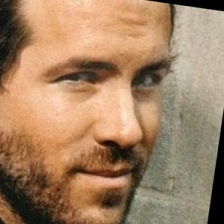

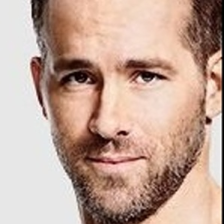

In [71]:
from google.colab.patches import cv2_imshow
distance = discrimination(
                            dataset["Ryan Reynolds"]["images"][6], 
                            dataset["Ryan Reynolds"]["images"][5]
                          )
similarity = "Similar" if distance < 500 else "dissimilar"

print(f"{similarity} with distance {distance}")
cv2_imshow(dataset["Ryan Reynolds"]["images"][5])
cv2_imshow(dataset["Ryan Reynolds"]["images"][6])

dissimilar with distance 973.2169617828677


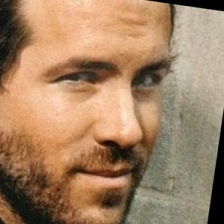

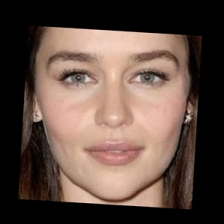

In [72]:
distance = discrimination(
                            dataset["Ryan Reynolds"]["images"][6], 
                            dataset["Emilia Clarke"]["images"][5]
                          )
similarity = "Similar" if distance < 500 else "dissimilar"

print(f"{similarity} with distance {distance}")
cv2_imshow(dataset["Ryan Reynolds"]["images"][5])
cv2_imshow(dataset["Emilia Clarke"]["images"][6])

I created a model that can detect similarity between arbitrary faces, unlike the SVC below, that will only work on these 100 

# 6. Use PCA for dimensionality reduction. [2 Marks]

Text(0, 0.5, 'cumulative explained variance')

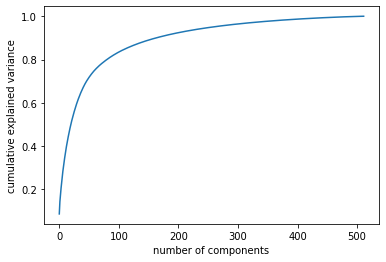

In [80]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Eyeballing the graph, I decided to pick 130 components

In [89]:
pca = PCA(n_components = 130)
pca = pca.fit(X)
pca_X = pca.transform(X)

In [90]:
pca_X.shape

(10770, 130)

### 7.Build an SVM classifier in order to map each image to its right person. [4 Marks]

In [91]:
from sklearn.svm import SVC

In [92]:
svc = SVC().fit(pca_X, non_OHE_labels)

In [120]:
def discrimination_v2(img):
    new_img = cv.resize(img, (224, 224))
    feat_1 = vgg_features(preprocess_input(np.asarray(new_img)[np.newaxis,]))
    #feat_2 = vgg_features(preprocess_input(np.asarray(img_2)[np.newaxis,]))
    #feat_1 = (feat_1 - tf.reduce_mean(feat_1)) / tf.math.reduce_std(feat_1)
    #feat_2 = (feat_2 - tf.reduce_mean(feat_2)) / tf.math.reduce_std(feat_2)
    #trans_1 = discriminator.transform(feat_1)
    #trans_2 = discriminator.transform(feat_2)
    #result = np.sum(np.square(trans_1 - trans_2))
    #result = (result - result.mean())/result.std()
    features_final = pca.transform(feat_1)
    pred = svc.predict(features_final)
    return pred

In [121]:
pred = discrimination_v2(dataset["Emilia Clarke"]["images"][6])[0]

decoder[int(pred)]

'Emilia Clarke'

### 8.Import and display the the test images. [2 Marks]


In [113]:
dwayne = cv.imread("./drive/MyDrive/Dwayne+Johnson4.jpg")

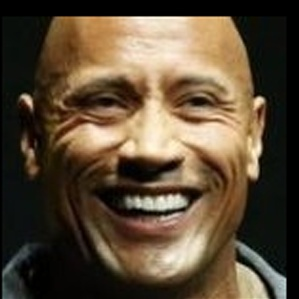

In [114]:
cv2_imshow(dwayne)

In [115]:
benedict = cv.imread("./drive/MyDrive/Benedict+Cumberbatch9.jpg")

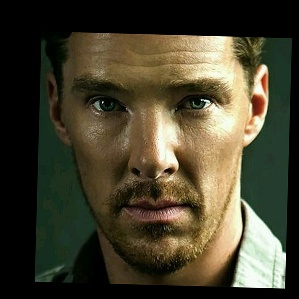

In [116]:
cv2_imshow(benedict)

### 9. Use the trained SVM model to predict the face on both test images. [4 Marks]

In [122]:
decoder [ int ( discrimination_v2(dwayne))]

'Dwayne Johnson'

In [123]:
decoder [ int ( discrimination_v2(benedict))]

'Benedict Cumberbatch'

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [150]:
train_face_data, test_face_data, train_face_labels, test_face_labels = train_test_split(
                                                                          pca_X,
                                                                          non_OHE_labels,
                                                                          test_size = 0.25
                                                                        )

svc_killing_time = SVC().fit(train_face_data, train_face_labels)

preds = svc_killing_time.predict(test_face_data)





In [151]:
for i in range(len(preds)):
  preds[i] = int(preds[i])

In [155]:
report = classification_report(test_face_labels, preds, output_dict = True)

In [164]:
print(classification_report(test_face_labels, preds))#, output_dict = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95        26
          10       0.90      0.95      0.92        37
          11       0.89      1.00      0.94        24
          12       0.97      0.97      0.97        29
          13       0.87      0.96      0.92        28
          14       1.00      0.93      0.96        43
          15       0.96      1.00      0.98        24
          16       1.00      1.00      1.00        30
          17       0.94      0.97      0.95        30
          18       0.96      0.88      0.92        26
          19       0.91      1.00      0.95        31
           2       1.00      0.96      0.98        28
          20       0.95      0.97      0.96        37
          21       0.77      0.94      0.85        18
          22       1.00      1.00      1.00        29
          23       0.88      0.97      0.92        31
          24       0.93    

# The above report is not easily understandable due to codes being used rather than names... the following is my attempt to fix that

In [165]:
keys = report.keys()
new_report = {}
for key in keys:
    #if key != "accuracy" :
      #if key != "Mike Colter":
          #print(key)
          if (key != "accuracy" and key != "macro avg" and key != "weighted avg") :
              new_report[decoder[int(key)]] = report[key]
          else : 
              new_report[key] = report[key]
          #del report[key]
    #else :
    #    break

In [196]:
print(f"\t\t    Precision   Recall f1-score Support")

for keys in new_report.keys():
    print(f"{keys : >20}", end = "\t")
    if keys == "accuracy" :
        print(f"\t       {new_report[keys] : .2f}")
        break
    for key in new_report[keys].keys():
        print(f"{new_report[keys][key]:.2f}", end = "\t")
    print()

		    Precision   Recall f1-score Support
          Aaron Paul	1.00	1.00	1.00	14.00	
        Alvaro Morte	0.90	1.00	0.95	26.00	
          Caity Lotz	0.90	0.95	0.92	37.00	
    Cameron Monaghan	0.89	1.00	0.94	24.00	
      Chance Perdomo	0.97	0.97	0.97	29.00	
         Chris Evans	0.87	0.96	0.92	28.00	
         Chris Pratt	1.00	0.93	0.96	43.00	
      Cobie Smulders	0.96	1.00	0.98	24.00	
  Danielle Panabaker	1.00	1.00	1.00	30.00	
         Dave Franco	0.94	0.97	0.95	30.00	
     Dominic Purcell	0.96	0.88	0.92	26.00	
      Dwayne Johnson	0.91	1.00	0.95	31.00	
         Amanda Crew	1.00	0.96	0.98	28.00	
       Emilia Clarke	0.95	0.97	0.96	37.00	
 Emily Bett Rickards	0.77	0.94	0.85	18.00	
          Emma Stone	1.00	1.00	1.00	29.00	
     Gwyneth Paltrow	0.88	0.97	0.92	31.00	
         Henry Cavil	0.93	1.00	0.96	26.00	
         Jason Momoa	1.00	1.00	1.00	31.00	
       Jeremy Renner	0.97	0.97	0.97	34.00	
     Jesse Eisenberg	1.00	1.00	1.00	22.00	
         Jim Parsons	1.00	0.96	0.98	25.00	
        Jon 